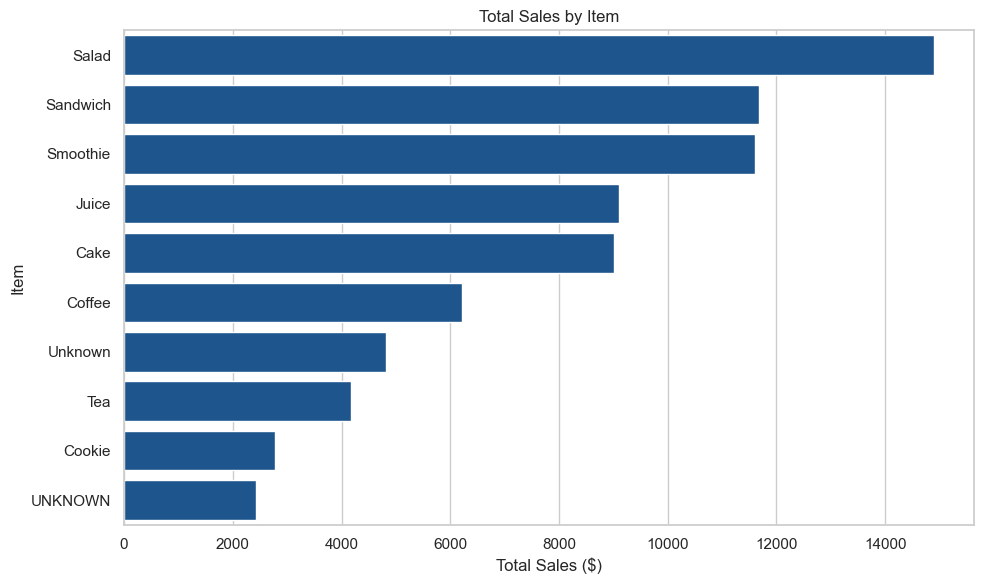

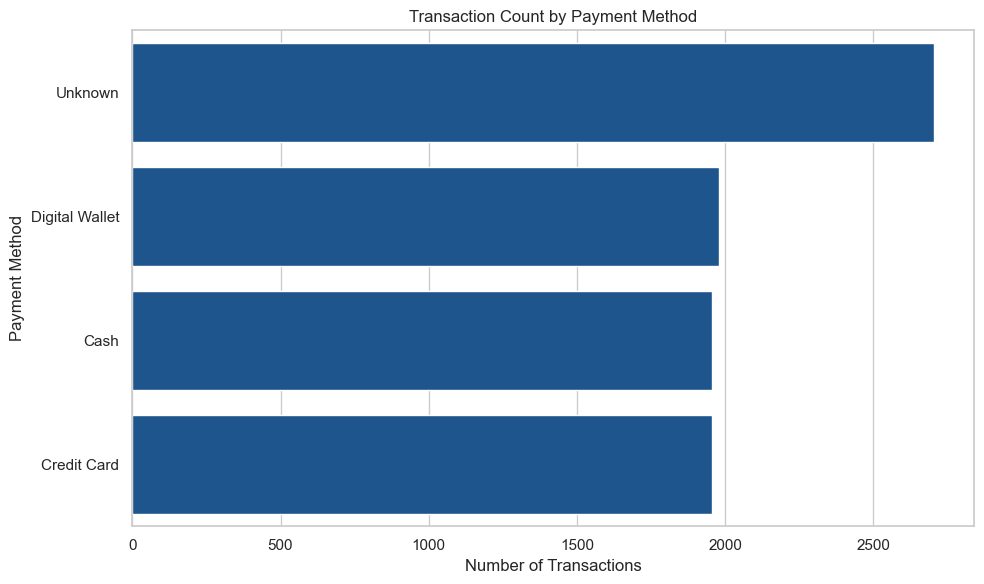

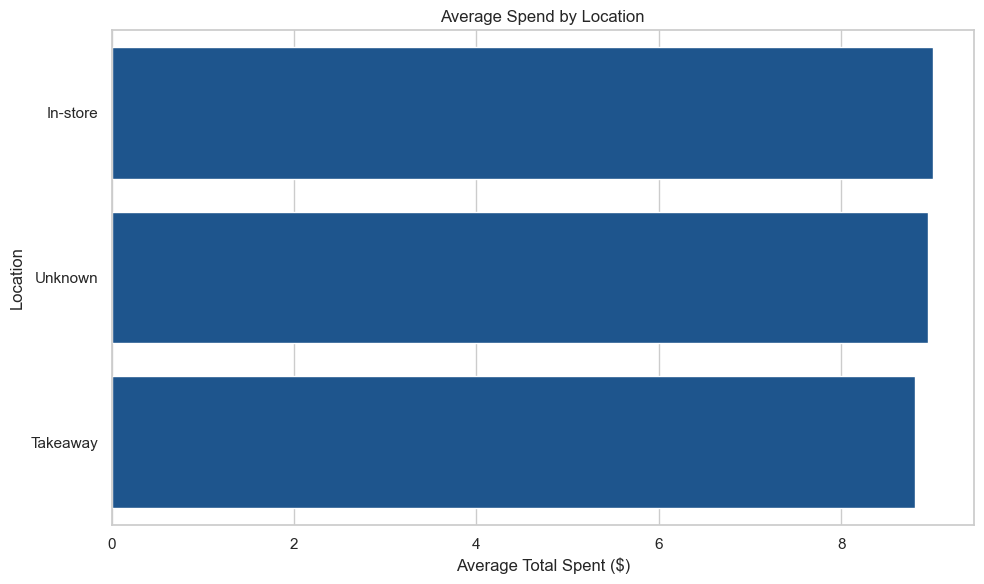

In [3]:
# Full cleaning and visualization script for dirty_cafe_sales.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load the dataset
df = pd.read_csv(r"C:\Users\Sharon\Desktop\dirty_cafe_sales.csv")

warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Convert numeric columns
df["Quantity"] = pd.to_numeric(df["Quantity"], errors='coerce')
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors='coerce')
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors='coerce')
df["Total Spent"].fillna(df["Quantity"] * df["Price Per Unit"], inplace=True)

# Step 2: Convert date column
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors='coerce')

# Step 3: Standardise and clean categorical data
df["Item"] = df["Item"].replace("ERROR", "Unknown")
df["Location"] = df["Location"].replace("ERROR", "Unknown")
df["Location"] = df["Location"].replace("UNKNOWN", "Unknown")
df["Location"].fillna("Unknown", inplace=True)
df["Item"].fillna("Unknown", inplace=True)

# Step 4: Clean payment methods
df["Payment Method"] = df["Payment Method"].apply(
    lambda x: x if x in ["Credit Card", "Cash", "Digital Wallet"] else "Unknown"
)

# Step 5: Drop rows with critical missing values
df.dropna(subset=["Transaction ID", "Item", "Quantity", "Price Per Unit", "Total Spent", "Transaction Date"], inplace=True)

# Set seaborn style
sns.set(style="whitegrid", palette="Blues_r")

# Graph 1: Total Sales by Item
plt.figure(figsize=(10, 6))
item_sales = df.groupby("Item")["Total Spent"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=item_sales, x="Total Spent", y="Item")
plt.title("Total Sales by Item")
plt.xlabel("Total Sales ($)")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

# Graph 2: Transaction Count by Payment Method
plt.figure(figsize=(10, 6))
payment_counts = df["Payment Method"].value_counts().reset_index()
payment_counts.columns = ["Payment Method", "Count"]
sns.barplot(data=payment_counts, x="Count", y="Payment Method")
plt.title("Transaction Count by Payment Method")
plt.xlabel("Number of Transactions")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

# Graph 3: Average Spend by Location
plt.figure(figsize=(10, 6))
location_avg = df.groupby("Location")["Total Spent"].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=location_avg, x="Total Spent", y="Location")
plt.title("Average Spend by Location")
plt.xlabel("Average Total Spent ($)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()